In [1]:
pip install pandas matplotlib seaborn wordcloud textblob vaderSentiment nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("Tweets.csv")  
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()
df['airline_sentiment'].value_counts()
df['airline'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

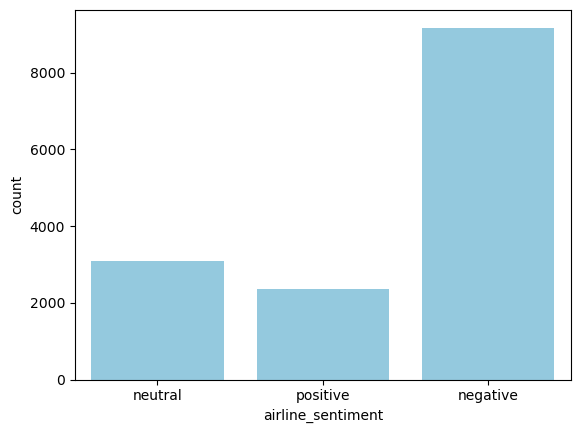

In [9]:
sns.countplot(data=df, x='airline_sentiment', color='skyblue')


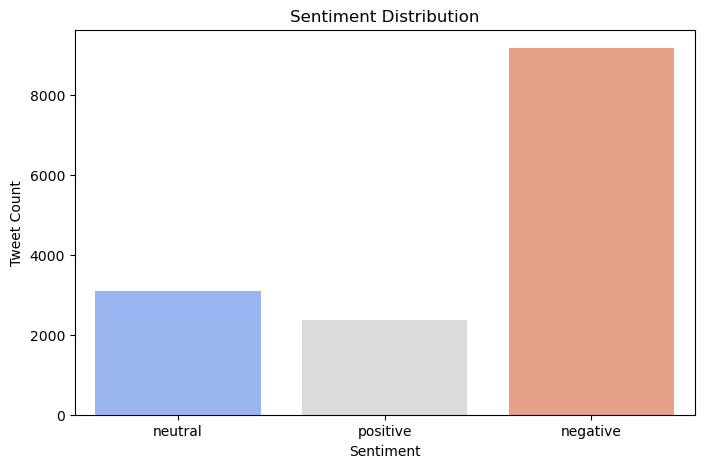

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='airline_sentiment', hue='airline_sentiment', palette='coolwarm', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


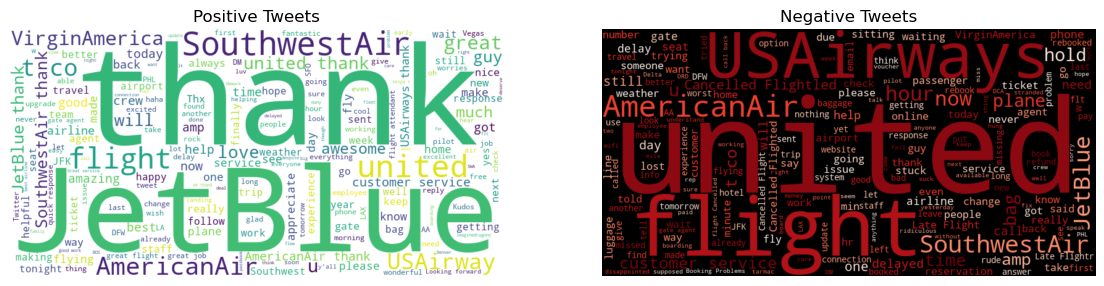

In [13]:
from wordcloud import WordCloud

positive_tweets = " ".join(df[df['airline_sentiment'] == "positive"]['text'])
negative_tweets = " ".join(df[df['airline_sentiment'] == "negative"]['text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_tweets)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets")
plt.show()


In [15]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|@\w+|#\w+", "", text) 
    text = re.sub(r"[^A-Za-z\s]", "", text)        
    return text.lower()

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercials to the experienc...
2,@VirginAmerica I didn't today... Must mean I n...,i didnt today must mean i need to take anothe...
3,@VirginAmerica it's really aggressive to blast...,its really aggressive to blast obnoxious ente...
4,@VirginAmerica and it's a really big bad thing...,and its a really big bad thing about it


In [17]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0: return "positive"
    elif polarity < 0: return "negative"
    else: return "neutral"

df['TextBlob_sentiment'] = df['cleaned_text'].apply(get_textblob_sentiment)


In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.05: return "positive"
    elif score < -0.05: return "negative"
    else: return "neutral"

df['VADER_sentiment'] = df['cleaned_text'].apply(get_vader_sentiment)


In [22]:

pd.crosstab(df['airline_sentiment'], df['TextBlob_sentiment'], normalize='index')
pd.crosstab(df['airline_sentiment'], df['VADER_sentiment'], normalize='index')


VADER_sentiment,negative,neutral,positive
airline_sentiment,,,
negative,0.497930,0.208324,0.293746
neutral,0.142304,0.425944,0.431752
positive,0.035971,0.098603,0.865425


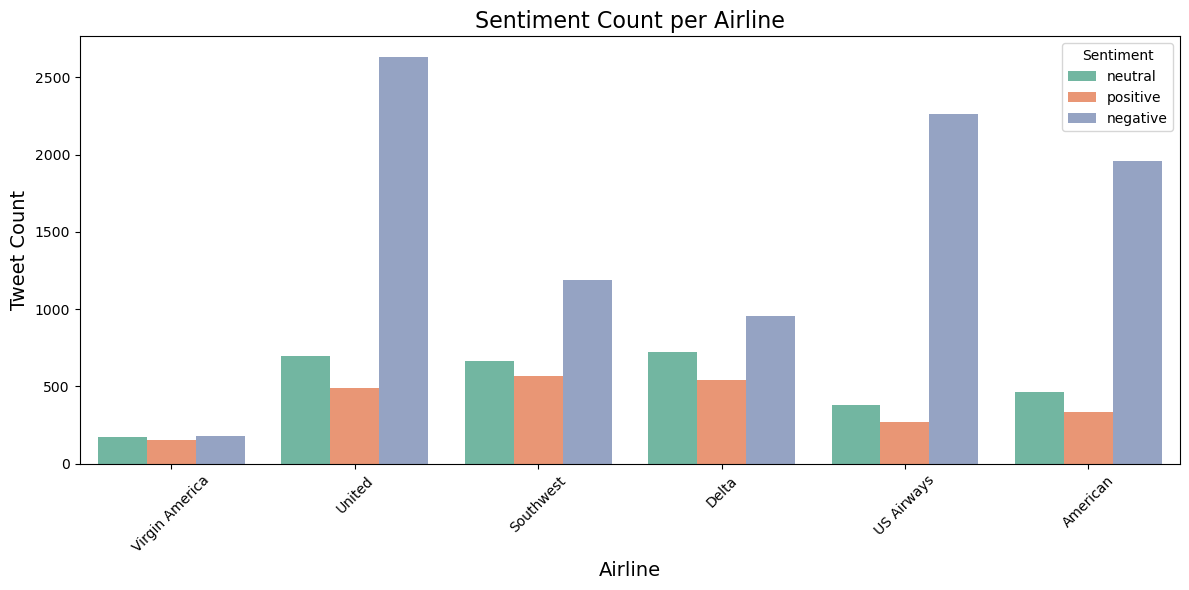

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')

plt.title("Sentiment Count per Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Tweet Count", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


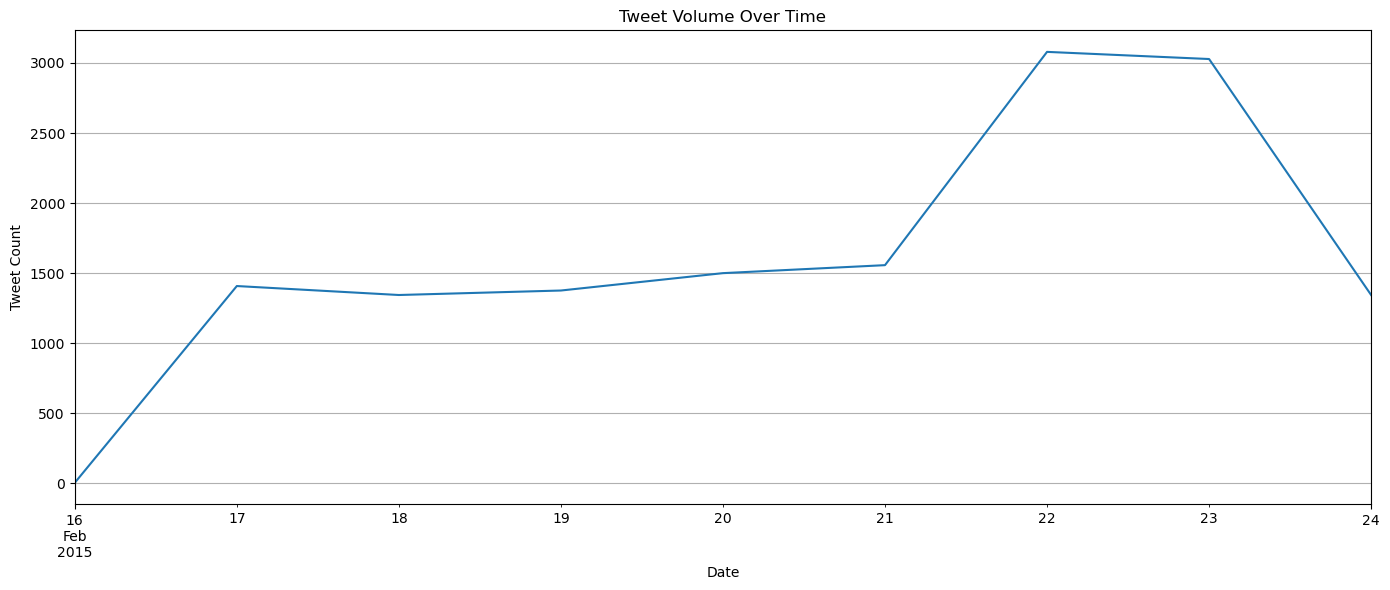

In [26]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df.set_index('tweet_created', inplace=True)

tweet_counts = df.resample('D').size()

plt.figure(figsize=(14, 6))
tweet_counts.plot()
plt.title('Tweet Volume Over Time')
plt.ylabel('Tweet Count')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


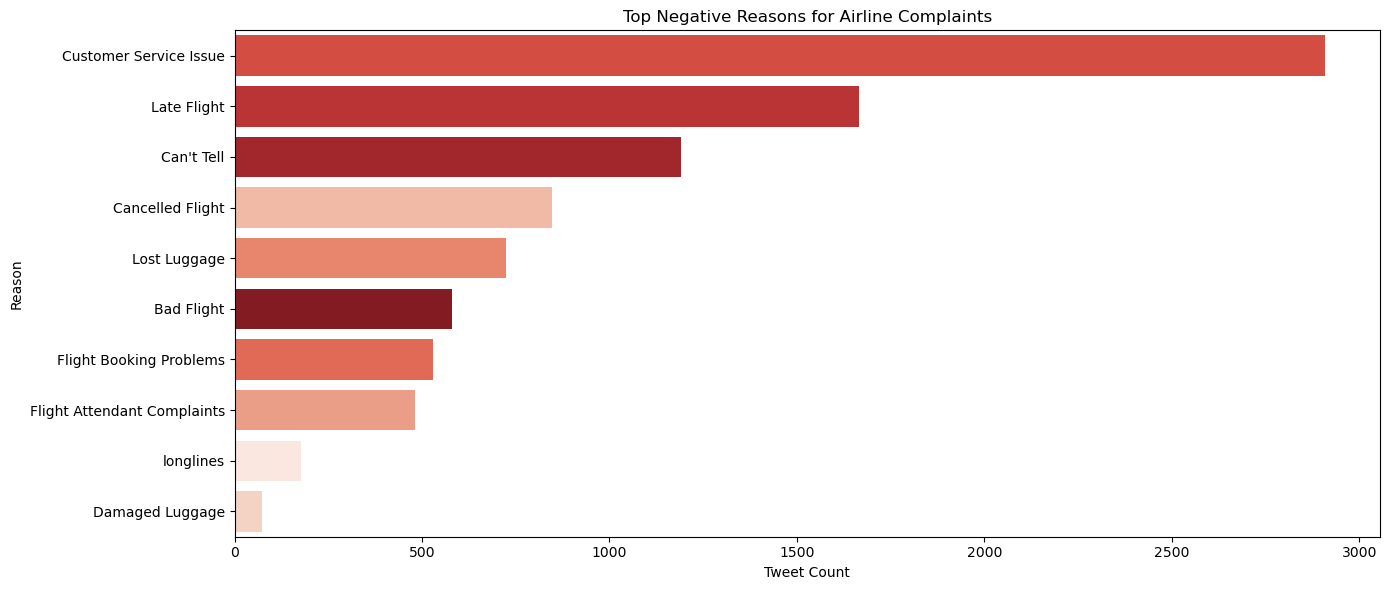

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.countplot(
    data=df[df['airline_sentiment'] == 'negative'],
    y='negativereason',
    hue='negativereason',
    order=df['negativereason'].value_counts().index,
    palette='Reds_r',
    legend=False
)
plt.title("Top Negative Reasons for Airline Complaints")
plt.xlabel("Tweet Count")
plt.ylabel("Reason")
plt.tight_layout()
plt.show()



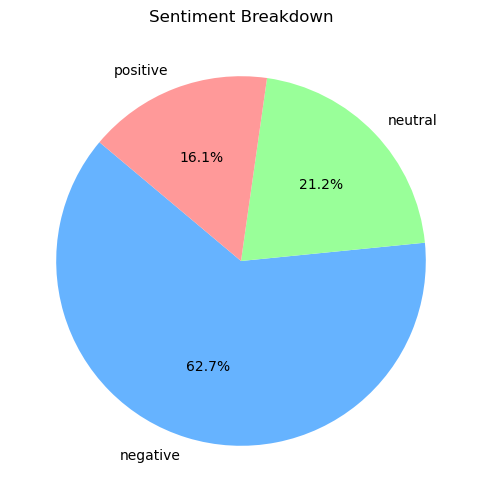

In [32]:
plt.figure(figsize=(6, 6))
df['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'], startangle=140)
plt.title("Sentiment Breakdown")
plt.ylabel("")  # Hide y-label
plt.show()


In [35]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))



In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

words = " ".join(df['cleaned_text']).split()
filtered_words = [word for word in words if word not in stopwords.words('english')]

word_freq = Counter(filtered_words)
common_words = word_freq.most_common(10)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
